<a href="https://colab.research.google.com/github/aezazueta/Marathon/blob/main/Marathon_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
#OJO: Si arroja un error de tipo "Cannot read property '_uploadFiles' of undefined 
#in google colaboratory" seguir los pasos de activacion de cookies de terceros
#enlace = shorturl.at/nX389

Saving MarathonData.csv to MarathonData (1).csv


Visualización rápida de los datos

In [ ]:
import io
import pandas as pd
dfMarathon = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))
dfMarathon.head()

,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [ ]:
dfMarathon['Name']

0         Blair MORGAN
1        Robert Heczko
2        Michon Jerome
3        Daniel Or lek
4         Luk ? Mr zek
            ...       
82    Stefano Vegliani
83      Andrej Madliak
84          Yoi Ohsako
85          Simon Dunn
86         Pavel ?imek
Name: Name, Length: 87, dtype: object

In [ ]:
dfMarathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


La columna "Wall21" contiene valores numéricos, sin embargo están formateados como tipo object. Se procede a cambio de tipo de valor.

In [ ]:
dfMarathon['Wall21'] = pd.to_numeric(dfMarathon['Wall21'], errors= 'coerce')

In [ ]:
dfMarathon.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


Visualización de datos numéricos en histogramas para buscar posibles patrones

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc5436dd590>,
      dtype=object)

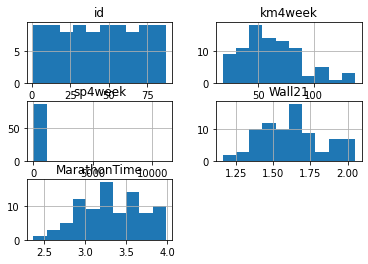

In [ ]:
dfMarathon.hist()

Se procede a eliminar columnas que no aportan información significativa para el entrenamiento del modelo.

In [ ]:
dfMarathon.drop(columns=['Name', 'id', 'Marathon', 'CATEGORY'], inplace=True)
dfMarathon.head()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74


Busqueda de elementos nulos

In [ ]:
dfMarathon.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

La columna 'CrossTraining' contiene muchos valores nulos, su auscencia se debe probablemente a que no se realizó tal actividad por lo que se reemplazarán los nulos por 0.

In [ ]:
dfMarathon['CrossTraining'] = dfMarathon['CrossTraining'].fillna(0)
dfMarathon.isna().sum()

Category         6
km4week          0
sp4week          0
CrossTraining    0
Wall21           6
MarathonTime     0
dtype: int64

Como los valores nulos de las columnas 'Category' y 'Wall21' coinciden en las mismas entradas y representan menos del 10% del total entonces se eliminan.

In [ ]:
dfMarathon.dropna(inplace=True, how='any')
print("Entradas restantes: ", dfMarathon.shape[0])
dfMarathon.isna().sum()

Entradas restantes:  81


Category         0
km4week          0
sp4week          0
CrossTraining    0
Wall21           0
MarathonTime     0
dtype: int64

Comprobación de 0 valores nulos en el dataset

In [ ]:
dfMarathon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     object 
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     object 
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), object(2)
memory usage: 4.4+ KB


Exploración de valores del campo 'CrossTraining'. Se detecta que los valores hacen referencia a un vslor numérico (tiempo en horas), por lo que se procede a aplicar label encoding 

In [ ]:
dfMarathon['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [ ]:
#fMarathon['CrossTraining'].map({'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h': 4, 'ciclista 13h':5})
#dfMarathon['CrossTraining'].unique()     NO FUNCIONÓ


In [ ]:
valoresCross = {'CrossTraining':  {'ciclista 1h':1, 'ciclista 3h':3, 'ciclista 4h':4, 'ciclista 5h':5, 'ciclista 13h':13}}
dfMarathon.replace(valoresCross, inplace=True)
dfMarathon['CrossTraining'].unique()

array([ 0,  1,  4, 13,  3,  5])

In [ ]:
dfMarathon['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [ ]:
Category_dummy = pd.get_dummies(dfMarathon['Category'], prefix='CAT')
dfMarathon = pd.concat([dfMarathon, Category_dummy], axis=1)
dfMarathon = dfMarathon.drop(['Category'], axis=1)
dfMarathon.head(15)

,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CAT_M40,CAT_M45,CAT_M50,CAT_M55,CAT_MAM,CAT_WAM
0,132.8,14.434783,0,1.16,2.37,0,0,0,0,1,0
1,68.6,13.674419,0,1.23,2.59,0,0,0,0,1,0
2,82.7,13.520436,0,1.30,2.66,0,0,0,0,1,0
3,137.5,12.258544,0,1.32,2.68,0,1,0,0,0,0
4,84.6,13.945055,0,1.36,2.74,0,0,0,0,1,0
5,42.2,13.612903,0,1.32,2.78,1,0,0,0,0,0
6,89.0,12.594340,0,1.38,2.81,1,0,0,0,0,0
7,106.0,12.694611,0,1.41,2.84,0,1,0,0,0,0
8,70.0,13.770492,1,1.38,2.83,0,0,0,0,1,0
9,84.2,13.365079,0,1.35,2.86,0,1,0,0,0,0


In [ ]:
#valoresCat = {'Category':   {'MAM':1, 'WAM':2, 'M40':3, 'M45':4, 'M50':5, 'M55':6}}
#dfMarathon.replace(valoresCat, inplace=True)
#dfMarathon['Category'].unique()

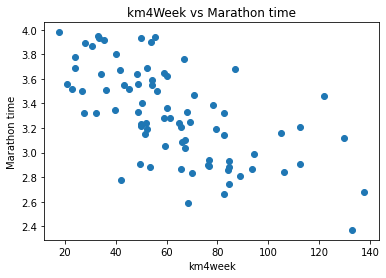

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x= dfMarathon['km4week'], y= dfMarathon['MarathonTime'])
plt.title('km4Week vs Marathon time')
plt.xlabel('km4week')
plt.ylabel('Marathon time')
plt.show()

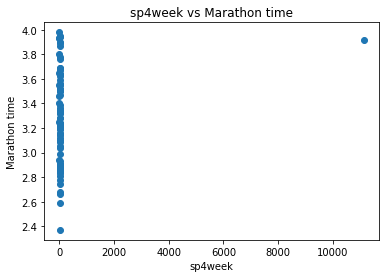

In [ ]:
plt.scatter(x= dfMarathon['sp4week'], y= dfMarathon['MarathonTime'])
plt.title('sp4week vs Marathon time')
plt.xlabel('sp4week')
plt.ylabel('Marathon time')
plt.show()

In [ ]:
dfMarathon = dfMarathon.query('sp4week<10000')

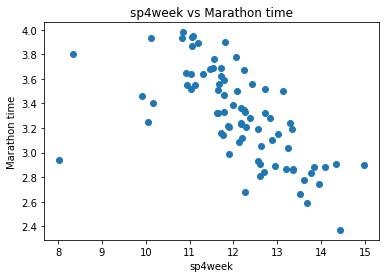

In [ ]:
plt.scatter(x= dfMarathon['sp4week'], y= dfMarathon['MarathonTime'])
plt.title('sp4week vs Marathon time')
plt.xlabel('sp4week')
plt.ylabel('Marathon time')
plt.show()

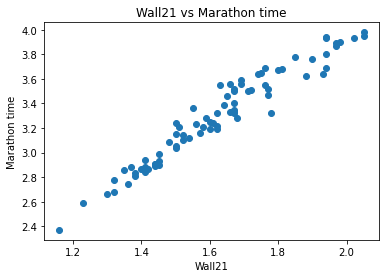

In [ ]:
plt.scatter(x= dfMarathon['Wall21'], y= dfMarathon['MarathonTime'])
plt.title('Wall21 vs Marathon time')
plt.xlabel('Wall21')
plt.ylabel('Marathon time')
plt.show()

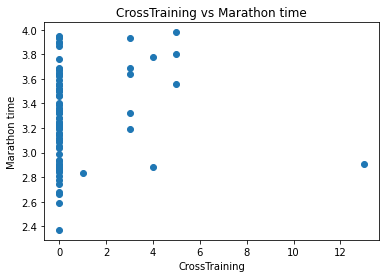

In [ ]:
plt.scatter(x= dfMarathon['CrossTraining'], y= dfMarathon['MarathonTime'])
plt.title('CrossTraining vs Marathon time')
plt.xlabel('CrossTraining')
plt.ylabel('Marathon time')
plt.show()

#Fase 2#

Entrenamiento de modelo

In [ ]:
datos_entrenamiento = dfMarathon.sample(frac=0.8, random_state=0)
datos_test = dfMarathon.drop(datos_entrenamiento.index)
print('Datos de entrenamiento (80%)', datos_entrenamiento.shape[0], '\n')
print('Datos para pruebas (20%)', datos_test.shape[0])

Datos de entrenamiento (80%) 64 

Datos para pruebas (20%) 16


In [ ]:
etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')
etiquetas_entrenamiento.head

<bound method NDFrame.head of 54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64>

In [ ]:
datos_entrenamiento.head()

,km4week,sp4week,CrossTraining,Wall21,CAT_M40,CAT_M45,CAT_M50,CAT_M55,CAT_MAM,CAT_WAM
54,70.7,11.783333,0,1.77,1,0,0,0,0,0
28,51.6,13.008403,0,1.50,0,1,0,0,0,0
31,79.4,13.344538,0,1.60,0,0,0,0,1,0
84,55.4,11.043189,0,1.94,1,0,0,0,0,0
47,39.6,12.247423,0,1.67,0,1,0,0,0,0


In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento, etiquetas_entrenamiento)

LinearRegression()

In [ ]:
predicciones = modelo.predict(datos_test)
predicciones 

array([2.80053896, 2.83447594, 3.06418527, 2.92922688, 3.05499957,
       3.17026   , 3.39413785, 3.24259245, 3.18140466, 3.28567351,
       3.38454939, 3.51506405, 3.58834999, 3.57374464, 3.67121957,
       3.86351016])

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print('Error porcentual:   %f' %(error*100))

Error porcentual:   12.042777


In [ ]:
nvo_corredor = pd.DataFrame(np.array([[400,15,0,1.4,0, 0, 1, 0, 0, 0]]), columns=['km4week', 'sp4week', 'CrossTraining', 'Wall21', 'CAT_M40', 'CAT_M45', 'CAT_M50', 'CAT_M55', 'CAT_MAM', 'CAT_WAM'])
nvo_corredor

,km4week,sp4week,CrossTraining,Wall21,CAT_M40,CAT_M45,CAT_M50,CAT_M55,CAT_MAM,CAT_WAM
0,400.0,15.0,0.0,1.4,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
modelo.predict(nvo_corredor)

array([2.35702166])